# Insper - Modelagem e Simulação do Mundo Físico

## Atividade - Lançamento oblíquo

---
### Inicialização

Nesta atividade vamos implementar um modelo de lançamento oblíquo de esferas de mesmo tamanho, porém compostas de materiais distintos:
- Ferro
- Madeira
- Isopor
- "Balão de ar" (plástico/ar)
- "Balão de hélio" (plástico/hélio)

Vamos realizar três iterações:
- A primeira levará em consideração apenas a força peso
- A segunda, além da força peso, levará em consideração também a força de resistência do ar
- A terceira, além da força peso e de resistência do ar, leverá em consideração também a força de empuxo do ar

Antes de começar, execute o código abaixo para importar todas as bibliotecas necessárias.

In [15]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

---
### Parâmetros e condições iniciais

Vamos começar definindo todos os parâmetros e condições iniciais, que serão comuns às três iterações.

#### Item 0a

Vamos assumir que as esferas possuem um raio ($r$) de $15cm$, isto é:
- $r = 0,15m$

Os valores das densidades ($\rho$) do ferro, madeira, isopor, "balão de ar" (plástico/ar) e "balão de hélio" (plástico/hélio) são facilmente obtidos na literatura:
- $\rho_f = 7.870 kg/m^3$
- $\rho_m = 600 kg/m^3$
- $\rho_i = 75 kg/m^3$
- $\rho_{ba} = 1,5 kg/m^3$
- $\rho_{bh} = 0,5 kg/m^3$

Da mesma forma, o valor da aceleração da gravidade ($g$), densidade do ar ($\rho_a$) e coeficiente de arrasto ($C_d$) de uma esfera também podem ser obtidos na literatura:
- $g = 9,81m/s^2$
- $\rho_a = 1,225 kg/m^3$
- $C_d = 0,47$. 

Defina varíaveis para todos esses parâmetros e calcule a área da seção transversal ($A$) e o volume ($V$) da esfera a partir deles (que serão úteis para o cálculo da força de arrasto e da massa das esferas, mais adiante).

In [16]:
# Implemente seu código do item 0a abaixo

# Definição dos parâmetros
r = 0.15               # Raio da esfera [m]
Cd = 0.47              # Coeficiente de arrasto da esfera [adimensional]
rho_f = 7870           # Desnidade do ferro [kg/m3]
rho_m = 600            # Densidade da madeira [kg/m3]
rho_i = 75             # Densidade do isopor [kg/m3]
rho_ba = 1.5            # Densidade do "balão" [kg/m3]
rho_bh = 0.5            # Densidade do "balão" [kg/m3]
rho_a = 1.225          # Densidade do ar [kg/m3]
g = 9.81               # Aceleração da gravidade [m/s2]

# Cálculo de parâmetros
A = pi*r**2       # Área da secção da esfera [m2]
V = (4/3)*pi*r**3 # Volume da esfera [m3]

# Lista de densidades e materiais
rho_lista = [rho_f,rho_m,rho_i,rho_ba,rho_bh]
material_lista = ['Ferro','Madeira','Isopor','Balão de ar','Balão de hélio']

print(A)
print(rho_lista)

0.07068583470577035
[7870, 600, 75, 1.5, 0.5]


#### Item 0b

As esferas serão lançadas da origem com velocidade inicial ($v_0$) de $20m/s$ e ângulo inicial ($\alpha_0$) de $45^{\circ}$. Defina estas variáveis e as condições iniciais $x_0$, $y_0$, $v_{x_0}$ e $v_{y_0}$ em função delas. Para isso, você precisará utilizar as funções `sin` e `cos` (não se esqueça que estas funções trabalham com radianos e não com graus). Se preferir, utize a função `radians`, do módulo `math`, para converter graus em radianos.

Também já defina uma lista de tempo de $0s$ a $5s$ com $\Delta t=10^{-3}$ $s$

In [17]:
# Implemente seu código do item 0b abaixo

# Condições iniciais
v0 = 20              # Velocidade inicial [m/s]
alpha0 = 45*pi/180   # Ângulo inicial [rad]
x0 = 0               # Posição em x inicial [m]
y0 = 0               # Posição em y inicial [m]
vx0 = v0*cos(alpha0) # Velocidade em x inicial [m/s]
vy0 = v0*sin(alpha0) # Velocidade em y inicial [m/s]
X0 = [x0,y0,vx0,vy0]

# Lista de tempo
dt = 1e-4
t_lista = np.arange(0,5,dt)

---
### 1ª iteração

Vamos começar considerando apenas a força peso, conforme vocês aprenderam no ensino médio.

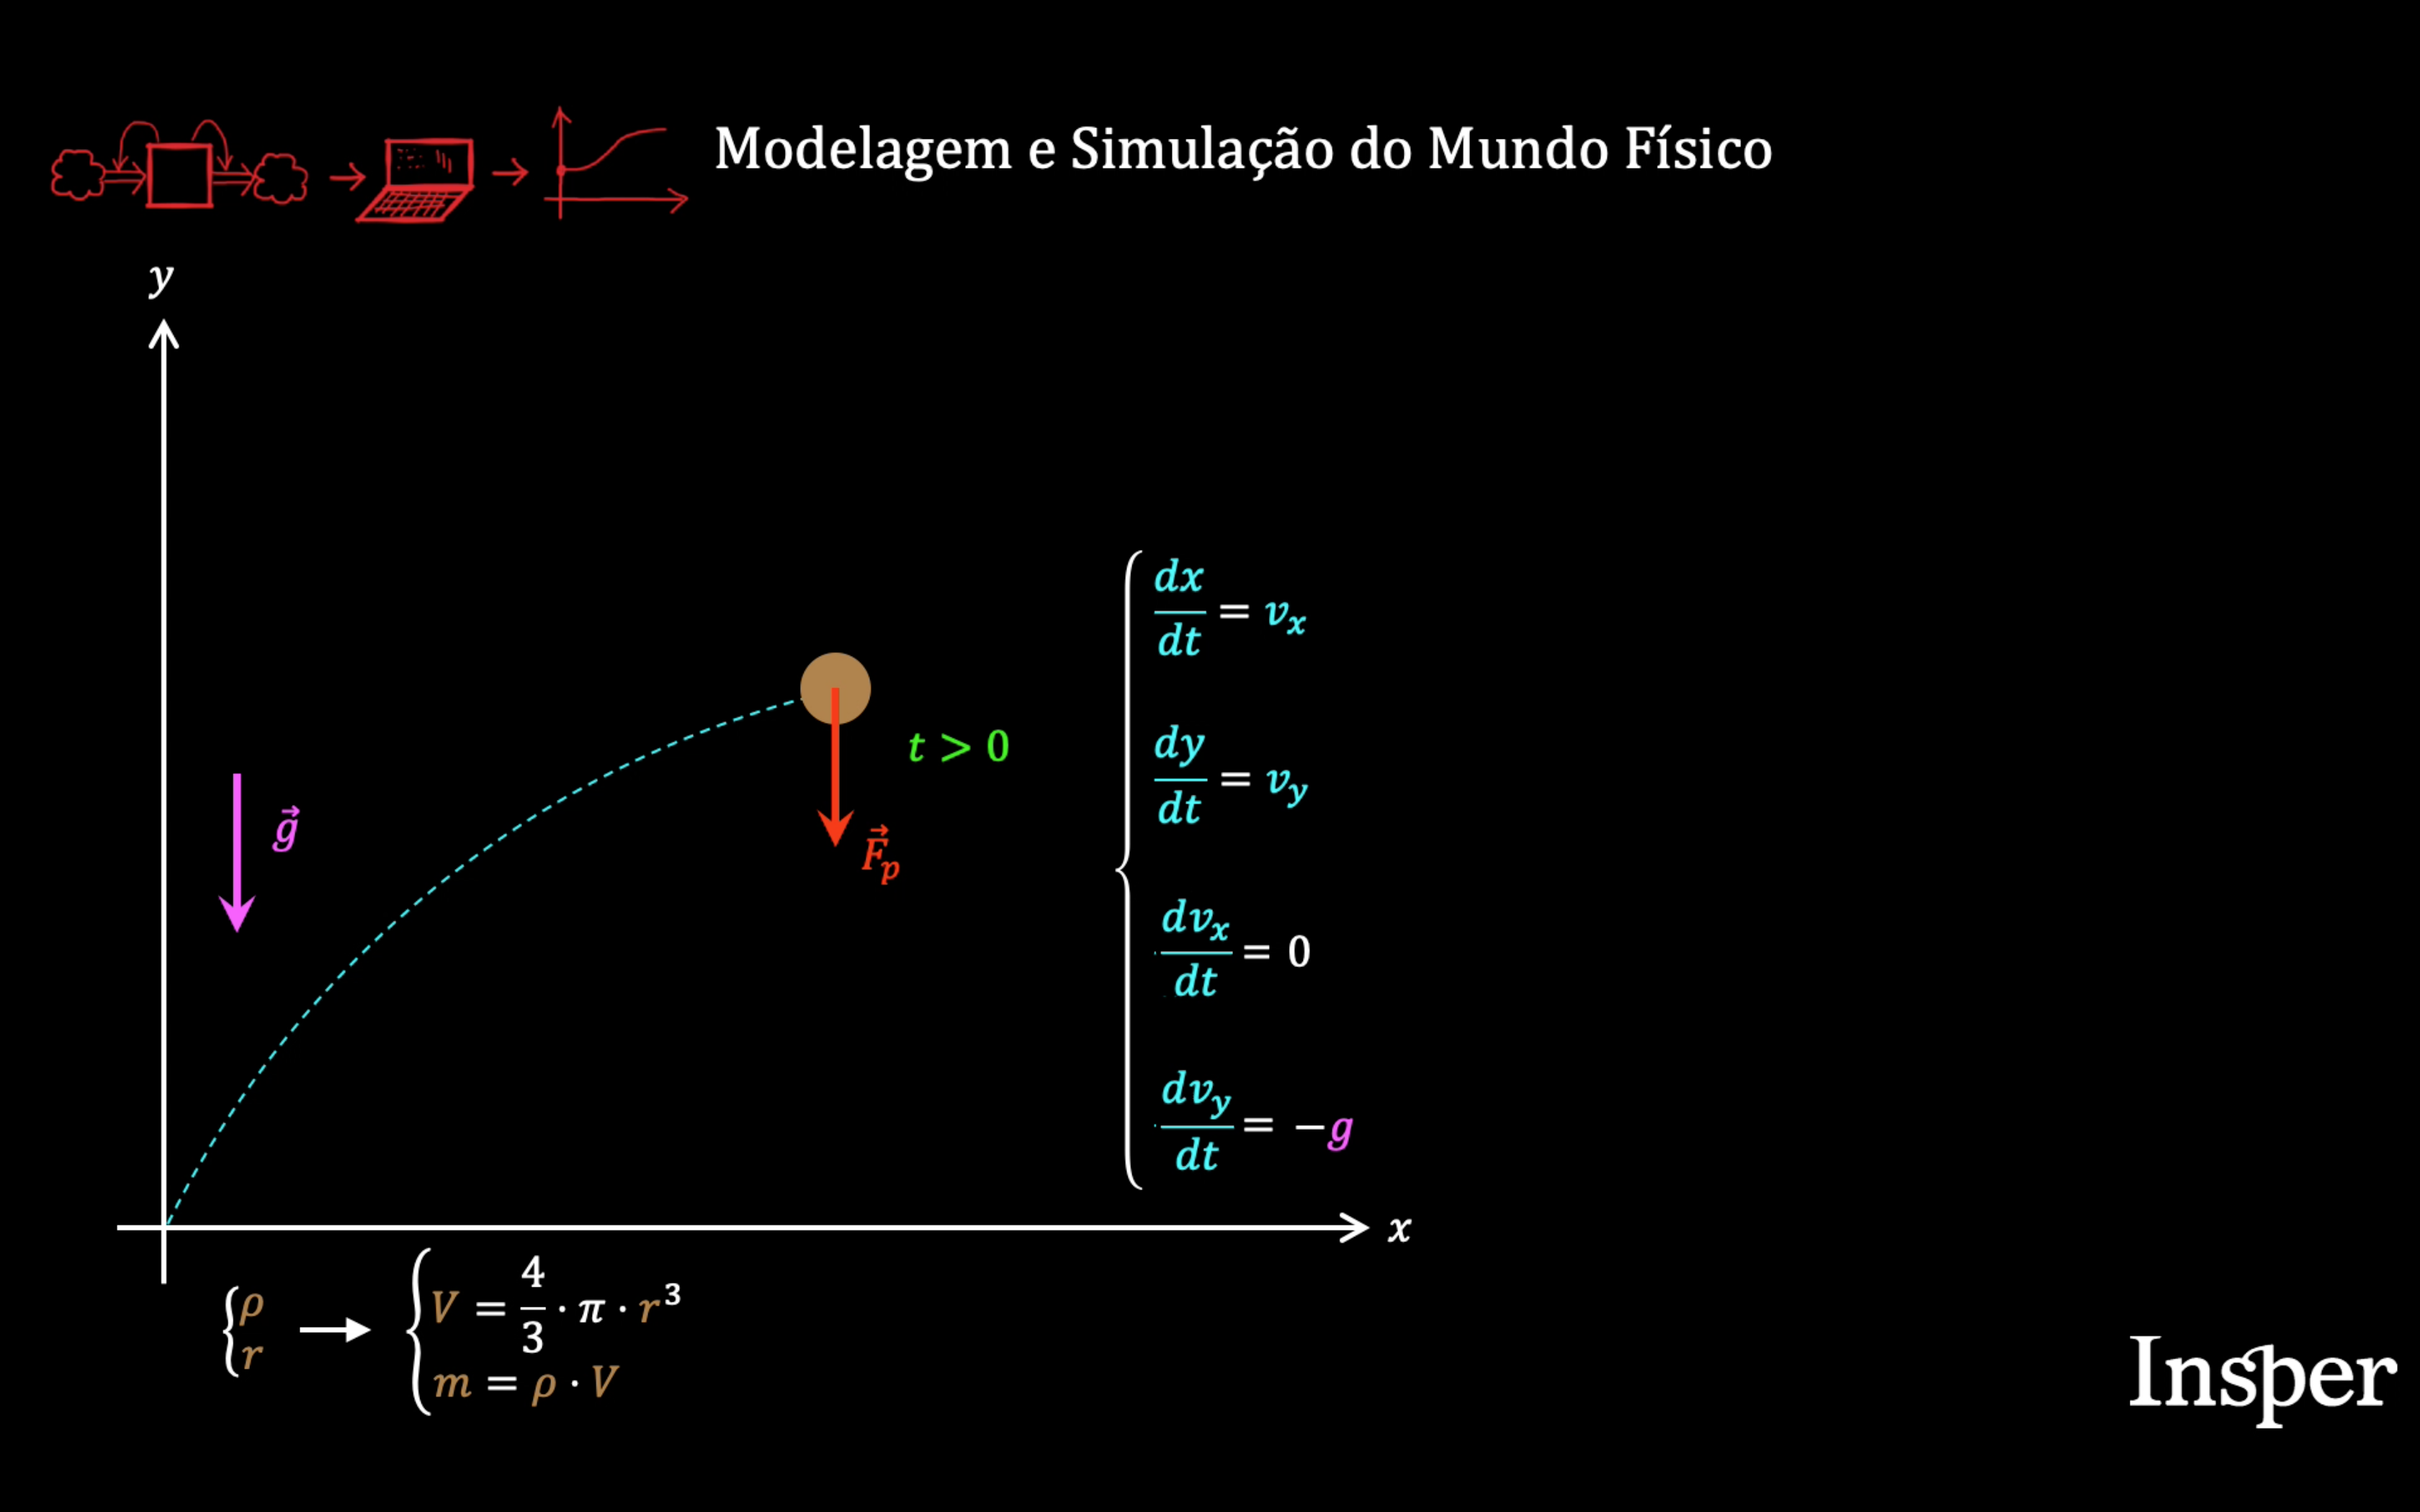

#### Item 1a

Implemente uma função (com o nome que quiser) que será utilizada posteriormente pela função `odeint` para resolver esse sistema de equações diferenciais. 

Essa função deve receber:
- Uma lista com os valores $x(t)$, $y(t)$, $v_x(t)$ e $v_y(t)$ em um determinado instante de tempo $t$
- O instante de tempo $t$
- A massa da esfera $m$ (parâmetro adicional)

E deve retornar:
- Uma lista com as taxas de variação (derivadas) $\dfrac{x(t)}{dt}$, $\dfrac{x(t)}{dt}$, $\dfrac{v_x(t)}{dt}$ e $\dfrac{v_y(t)}{dt}$ no instante de tempo $t$

Note que a esfera não pode atravessar o chão, por isso o seu código deve considerar o caso em que $y(t)<0$.

In [18]:
# Implemente seu código do item 1a abaixo

# Implementação do modelo (a ser utilizada pela odeint)
def modelo1(X, t, m):
    # Desagrupa lista
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]    
    # Calcula as taxas de variação
    dxdt = vx
    dydt = vy
    dvxdt = 0
    dvydt = -g
    # Verifica se a esfera já atingiu o chão (caso positivo para de integrar)
    if y < 0:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0  
    # Agrupe lista com as taxas de variação
    dXdt = [dxdt, dydt, dvxdt, dvydt]
    # Retorna lista com as taxas de variação
    return dXdt

#### Item 1b

Utilizando a função que você implementou no item anterior, resolva o sistema de equações diferenciais utilizando a função `odeint` para cada uma das esferas. Para isso, crie uma estrutura de repetição que utilize a função `odeint` algumas vezes, uma para cada valor de $m$.

Em seguida, plote a trajetória, isto é, um gráfico de $x(t)$ por $y(t)$, de todas as esferas em uma mesma figura.

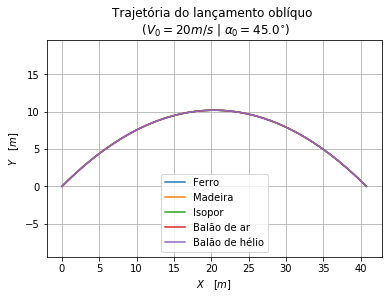

In [19]:
# Implemente seu código do item 1b abaixo

# Utiliza a função odeint várias vezes, uma para cada densidade
for i in range(len(rho_lista)):
    X_lista = odeint(modelo1, X0, t_lista, args=(V*rho_lista[i],))
    x_lista = X_lista[:,0]
    y_lista = X_lista[:,1]
    plt.plot(x_lista,y_lista,label=material_lista[i])
    
# Configura gráfico
plt.title('Trajetória do lançamento oblíquo \n ($V_0 ='+str(v0)+'m/s$ | $\\alpha_0 = '+str(alpha0*180/pi)+'^{\circ}$)')
plt.axis('equal')
plt.xlabel('$X \quad [m]$')
plt.ylabel('$Y \quad [m]$')
plt.legend()
plt.grid(True)
plt.show()

Como era de se esperar, todas as esferas devem ter apresentado a mesma trajetória. Caso isso não tenha ocorrido pra você, volte na implementação do seu modelo e verifique se não cometeu nenhum erro.

#### Item 1c


A partir da lista de valores de `x` e `y` que a função `odeint` retornou, utilize a função `max` para calcular o alcance máximo ($x_{max}$) e a altura máxima ($y_{max}$) da esfera. 

Em seguida, calcule novamente esses dois valores, mas, desta vez, utilizando as fórmulas que você aprendeu no ensino médio:

$x_{max} = \dfrac{v_0^2 \cdot \sin 2\theta_0}{g}$

$y_{max} = \dfrac{v_0^2 \cdot \sin^2 \theta_0}{2 \cdot g}$

Verifique se os resultados batem em ambos os casos.

In [20]:
# Implemente seu código do item 1c abaixo

x_max = max(x_lista)
y_max = max(y_lista)
print('Alcance máximo (odeint): %.2f'%x_max,'m')
print('Altura máxima (odeint): %.2f'%y_max,'m')

x_max = v0**2*sin(2*alpha0)/g
y_max = v0**2*sin(alpha0)**2/(2*g)
print('Alcance máximo (fórmula): %.2f'%x_max,'m')
print('Altura máxima (fórmula): %.2f'%y_max,'m')

Alcance máximo (odeint): 40.77 m
Altura máxima (odeint): 10.19 m
Alcance máximo (fórmula): 40.77 m
Altura máxima (fórmula): 10.19 m


Esta é uma maneira simples e eficaz de realizar uma validação da implementação do seu modelo, mas, infelizmente, só é válida nos casos mais simples, que apresentam soluções analíticas. 

---
### 2ª iteração

Vamos considerar agora, além da força peso, a força de resistência do ar.

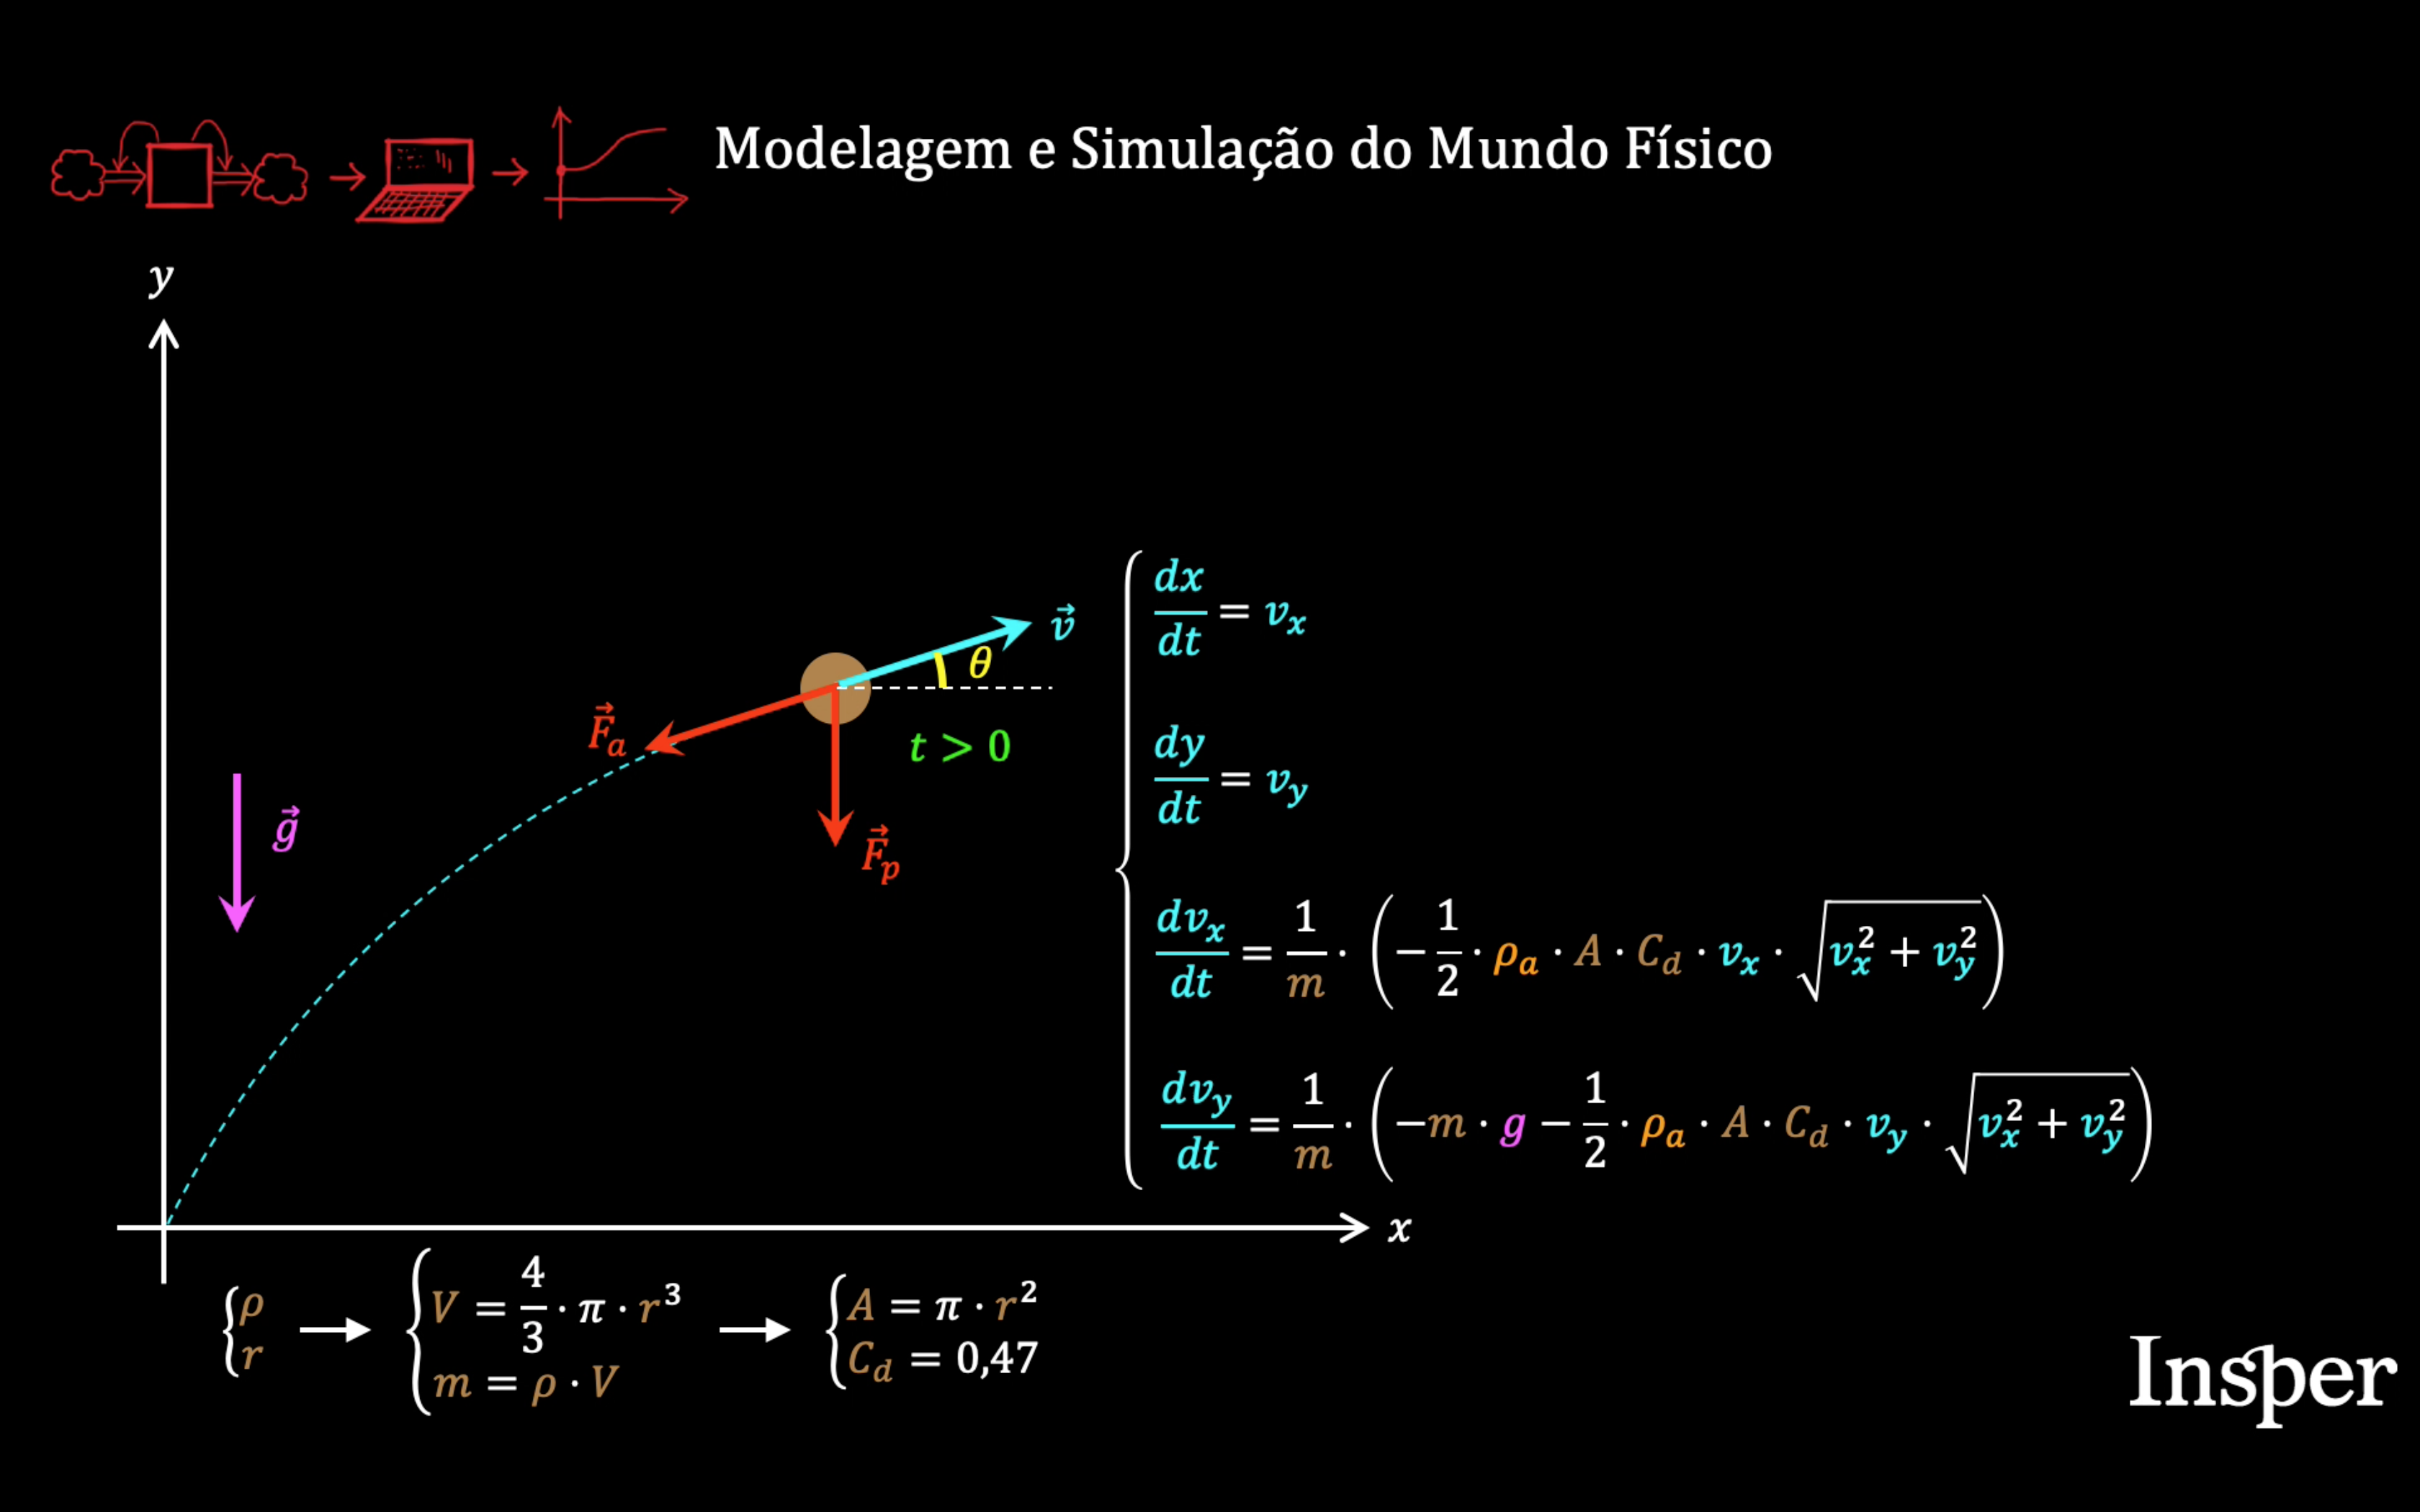

#### Item 2a

Implemente novamente a função do **Item 1a**, que será utilizada posteriormente pela função `odeint` para resolver esse sistema de equações diferenciais, porém agora levando em consideração a força de resistência do ar.

In [21]:
# Implemente seu código do item 2a abaixo
# Implementação do modelo (a ser utilizada pela odeint)
def modelo2(X, t, m):
    # Desagrupa lista
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]    
    # Calcula as taxas de variação
    dxdt = vx
    dydt = vy
    dvxdt = (1/m)*(-(1/2)*rho_a*A*Cd*vx*sqrt(vx**2+vy**2))
    dvydt = (1/m)*(-m*g-(1/2)*rho_a*A*Cd*vy*sqrt(vx**2+vy**2))
    # Verifica se a esfera já atingiu o chão (caso positivo para de integrar)
    if y < 0:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0  
    # Agrupe lista com as taxas de variação
    dXdt = [dxdt, dydt, dvxdt, dvydt]
    # Retorna lista com as taxas de variação
    return dXdt

#### Item 2b

Utilizando a função que você implementou no item anterior, resolva o sistema de equações diferenciais utilizando a função `odeint` para cada uma das esferas, da mesma forma que você fez no **Item 1b**.

Em seguida, plote a trajetória, isto é, um gráfico de $x(t)$ por $y(t)$, de todas as esferas em uma mesma figura.

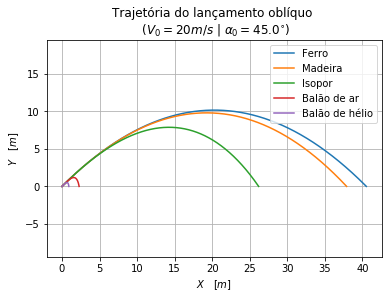

In [25]:
# Implemente seu código do item 2b abaixo

# Utiliza a função odeint 3 vezes, uma para cada massa
for i in range(len(rho_lista)):
    X_lista = odeint(modelo2, X0, t_lista, args=(V*rho_lista[i],), mxordn=1)
    x_lista = X_lista[:,0]
    y_lista = X_lista[:,1]
    plt.plot(x_lista,y_lista,label=material_lista[i])
    
# Configura gráfico
plt.title('Trajetória do lançamento oblíquo \n ($V_0 ='+str(v0)+'m/s$ | $\\alpha_0 = '+str(alpha0*180/pi)+'^{\circ}$)')
plt.axis('equal')
plt.xlabel('$X \quad [m]$')
plt.ylabel('$Y \quad [m]$')
plt.legend()
plt.grid(True)
plt.show()

Note que, agora, as esferas mais pesadas tiveram um alcance maior, o que faz sentido do ponto de vista físico. Caso isso não tenha ocorrido, volte na implementação do seu modelo e verifique se você não cometeu nenhum erro.

O que continua não fazendo sentido é o balão de hélio cair. Nós sabemos que, pelo hélio ser menos denso que o ar, ele deveria subir. Ocorre que como não estamos levando em consideração (ainda) a força de empuxo do ar.

#### Item 2c

Crie dois gráficos conclusivos:
- Alcance máximo ($X_{max}$) do lançamento oblíquo em função da densidade ($\rho$) da esfera
- Altura máxima ($Y_{max}$) do lançamento oblíquo em função da densidade ($\rho$) da esfera

Para facilitar a visualização, deixe o eixo das abscissas em escala logarítmica utilizando a função `plt.xscale('log')`.

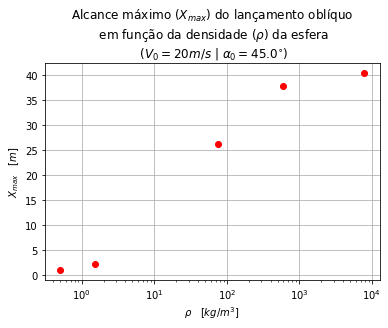

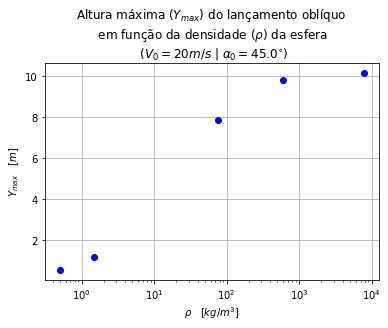

In [9]:
# Implemente seu código do item 2c abaixo

# Cria listas com os alcances e alturas máximos de cada esfera
x_max_lista = []
y_max_lista = []

# Utiliza a função odeint 3 vezes, uma para cada massa
for i in range(len(rho_lista)):
    X_lista = odeint(modelo2, X0, t_lista, args=(V*rho_lista[i],))
    x_lista = X_lista[:,0]
    y_lista = X_lista[:,1]
    x_max_lista.append(max(x_lista))
    y_max_lista.append(max(y_lista))
    
# Plota e configura gráfico
plt.plot(rho_lista,x_max_lista,'ro')
plt.title('Alcance máximo ($X_{max}$) do lançamento oblíquo \n em função da densidade ($\\rho$) da esfera \n ($V_0 ='+str(v0)+'m/s$ | $\\alpha_0 = '+str(alpha0*180/pi)+'^{\circ}$)')
plt.xscale('log')
plt.xlabel('$\\rho \quad [kg/m^3]$')
plt.ylabel('$X_{max} \quad [m]$')
plt.grid(True)
plt.show()
    
# Plota e configura gráfico
plt.plot(rho_lista,y_max_lista,'bo')
plt.title('Altura máxima ($Y_{max}$) do lançamento oblíquo \n em função da densidade ($\\rho$) da esfera \n ($V_0 ='+str(v0)+'m/s$ | $\\alpha_0 = '+str(alpha0*180/pi)+'^{\circ}$)')
plt.xscale('log')
plt.xlabel('$\\rho \quad [kg/m^3]$')
plt.ylabel('$Y_{max} \quad [m]$')
plt.grid(True)
plt.show()

Compare o alcance máximo ($X_{max}$) e a altura máxima ($Y_{max}$) dos gráficos acima com os calculados na 1º iteração, que não levavam em conta a força de resistência do ar. Veja como as esferas mais pesadas quase não sofrem influência da resistência do ar, enquanto as mais leves sofrem bastante.

---
### 3ª iteração

Por fim, vamos considerar, além da força peso e da força de resistência do ar, a força de empuxo do ar.

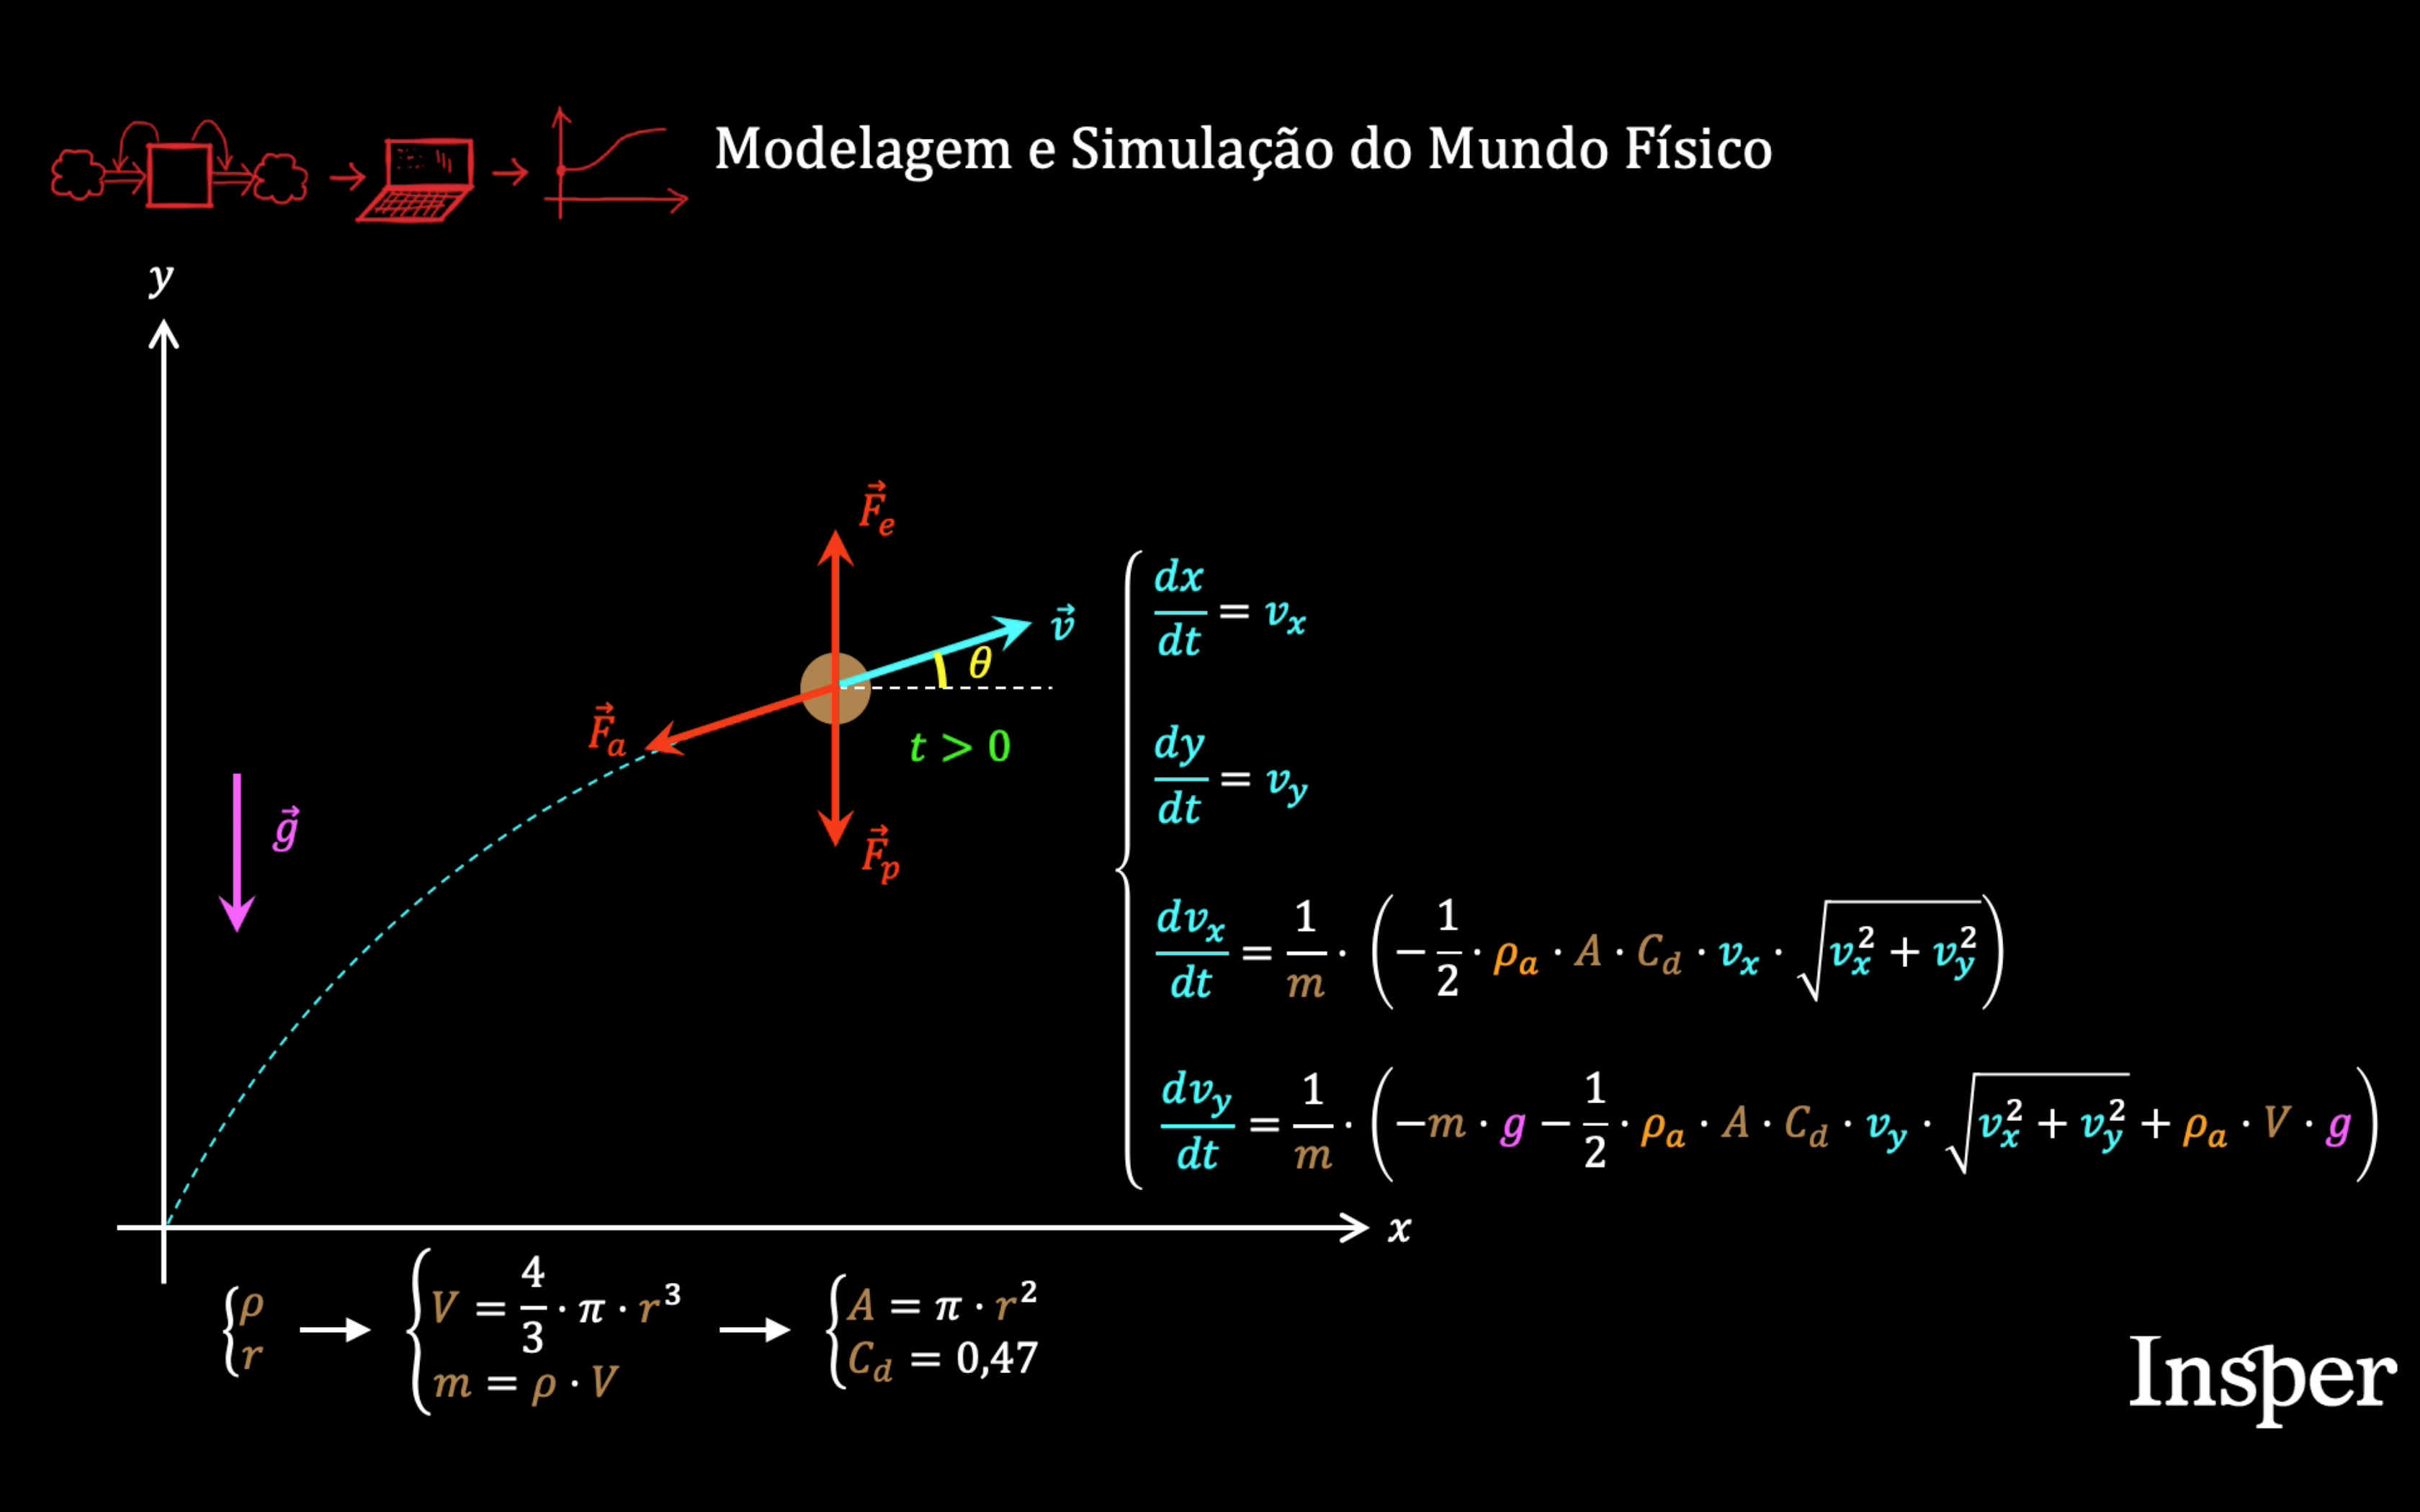

#### Item 3a

Implemente novamente a função do **Item 2a**, porém agora levando em consideração a força de empuxo do ar.

In [10]:
# Implemente seu código do item 3a abaixo

# Implementação do modelo (a ser utilizada pela odeint)
def modelo3(X, t, m):
    # Desagrupa lista
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]    
    # Calcula as taxas de variação
    dxdt = vx
    dydt = vy
    
    dvxdt = (1/m)*(-(1/2)*rho_a*A*Cd*vx*sqrt(vx**2+vy**2))
    dvydt = (1/m)*(-m*g-(1/2)*rho_a*A*Cd*vy*sqrt(vx**2+vy**2)+rho_a*V*g)
    # Verifica se a esfera já atingiu o chão (caso positivo para de integrar)
    if y < 0:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0  
    # Agrupe lista com as taxas de variação
    dXdt = [dxdt, dydt, dvxdt, dvydt]
    # Retorna lista com as taxas de variação
    return dXdt

#### Item 3b

Utilizando a função que você implementou no item anterior, resolva o sistema de equações diferenciais utilizando a função `odeint` para cada uma das esferas, da mesma forma que você fez no **Item 1b** e no **Item 2b**.

Em seguida, plote a trajetória, isto é, um gráfico de $x(t)$ por $y(t)$, de todas as esferas em uma mesma figura.

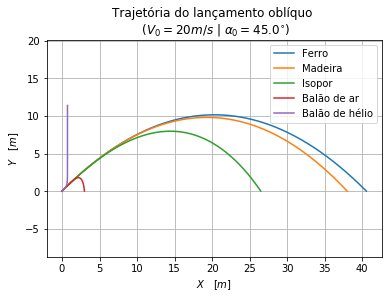

In [11]:
# Implemente seu código do item 3b abaixo

# Utiliza a função odeint 3 vezes, uma para cada massa
for i in range(len(rho_lista)):
    X_lista = odeint(modelo3, X0, t_lista, args=(V*rho_lista[i],))
    x_lista = X_lista[:,0]
    y_lista = X_lista[:,1]
    plt.plot(x_lista,y_lista,label=material_lista[i])
    
# Configura gráfico
plt.title('Trajetória do lançamento oblíquo \n ($V_0 ='+str(v0)+'m/s$ | $\\alpha_0 = '+str(alpha0*180/pi)+'^{\circ}$)')
plt.axis('equal')
plt.xlabel('$X \quad [m]$')
plt.ylabel('$Y \quad [m]$')
plt.legend()
plt.grid(True)
plt.show()

Como era de se esperar, agora o balão de hélio está subindo. Caso isso não ocorra no seu código, volte na implementação do seu modelo e verifique se você não cometeu nenhum erro.

#### Item 3c

Crie os dois gráficos conclusivos do **Item 2c** novamente:
- Alcance máximo ($X_{max}$) do lançamento oblíquo em função da densidade ($\rho$) da esfera
- Altura máxima ($Y_{max}$) do lançamento oblíquo em função da densidade ($\rho$) da esfera

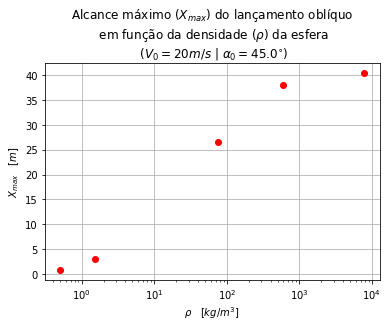

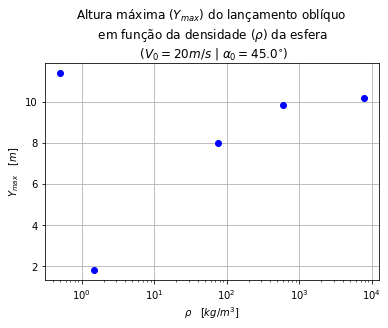

In [12]:
# Implemente seu código do item 3c abaixo

# Cria listas com os alcances e alturas máximos de cada esfera
x_max_lista = []
y_max_lista = []

# Utiliza a função odeint 3 vezes, uma para cada massa
for i in range(len(rho_lista)):
    X_lista = odeint(modelo3, X0, t_lista, args=(V*rho_lista[i],))
    x_lista = X_lista[:,0]
    y_lista = X_lista[:,1]
    x_max_lista.append(max(x_lista))
    y_max_lista.append(max(y_lista))
    
# Plota e configura gráfico
plt.plot(rho_lista,x_max_lista,'ro')
plt.title('Alcance máximo ($X_{max}$) do lançamento oblíquo \n em função da densidade ($\\rho$) da esfera \n ($V_0 ='+str(v0)+'m/s$ | $\\alpha_0 = '+str(alpha0*180/pi)+'^{\circ}$)')
plt.xscale('log')
plt.xlabel('$\\rho \quad [kg/m^3]$')
plt.ylabel('$X_{max} \quad [m]$')
plt.grid(True)
plt.show()
    
# Plota e configura gráfico
plt.plot(rho_lista,y_max_lista,'bo')
plt.title('Altura máxima ($Y_{max}$) do lançamento oblíquo \n em função da densidade ($\\rho$) da esfera \n ($V_0 ='+str(v0)+'m/s$ | $\\alpha_0 = '+str(alpha0*180/pi)+'^{\circ}$)')
plt.xscale('log')
plt.xlabel('$\\rho \quad [kg/m^3]$')
plt.ylabel('$Y_{max} \quad [m]$')
plt.grid(True)
plt.show()

Como você deve ter verificado, a altura máxima do balão de hélio foi um pouco maior que a do balão de ferro. Isso, na verdade, ocorreu por que realizamos uma simulação de apenas $5s$. Se aumentássemos o tempo de nossa simulação, o balão de hélio iria continuar subindo infinitamente, com uma altura máxima cada vez maior. Ou seja, na realidade não faz sentido colocar no gráfico de altura máxima esferas cuja densidade é menor do que a do ar (como é o caso do balão de hélio).

---
### Análise das iterações

Não seria legal plotar em uma mesma figura os gráficos conclusivos das 3 iterações? Assim, seria possível verificar para quais faixas de densidade cada iteração é significativa.

#### Item 4

Inicialmente, declare uma lista com 20 valores de densidade (em escala logarítmica) cujo primeiro termo seja igual à densidade do balão de ar $\rho_{ba}\approx 10^{0,2}$ e cujo último termo seja igual à densidade do ferro $\rho_f\approx 10^4$. Para isso, você podê utilizar a função `np.logspace(0.2,4,20)` (você sabe o por que dos números `0.2`, `4` e `20`? Pense um pouco!).

Em seguida, crie os dois gráficos conclusivos do **Item 3c**, porém, com as 3 iterações em uma mesma figura:
- Alcance máximo ($X_{max}$) do lançamento oblíquo em função da densidade ($\rho$) da esfera
- Altura máxima ($Y_{max}$) do lançamento oblíquo em função da densidade ($\rho$) da esfera

[1.58489319e+00 2.51188643e+00 3.98107171e+00 6.30957344e+00
 1.00000000e+01 1.58489319e+01 2.51188643e+01 3.98107171e+01
 6.30957344e+01 1.00000000e+02 1.58489319e+02 2.51188643e+02
 3.98107171e+02 6.30957344e+02 1.00000000e+03 1.58489319e+03
 2.51188643e+03 3.98107171e+03 6.30957344e+03 1.00000000e+04]


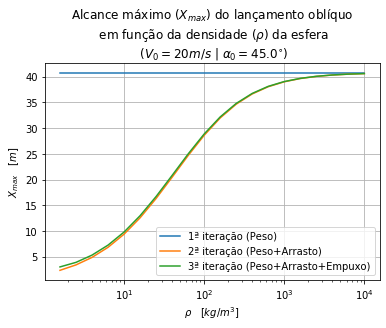

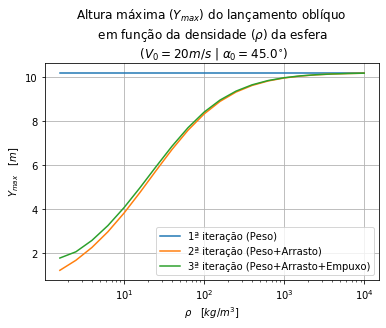

In [13]:
# Implemente seu código do item 4 abaixo

# Cria listas com os alcances e alturas máximos de cada esfera
x_max_lista_1 = []
x_max_lista_2 = []
x_max_lista_3 = []
y_max_lista_1 = []
y_max_lista_2 = []
y_max_lista_3 = []

# Cria listas com as densidades
rho_lista = np.logspace(0.2, 4, 20)
print(rho_lista)

# Utiliza a função odeint 3 vezes, uma para cada massa
for i in range(len(rho_lista)):
    X_lista_1 = odeint(modelo1, X0, t_lista, args=(V*rho_lista[i],))
    X_lista_2 = odeint(modelo2, X0, t_lista, args=(V*rho_lista[i],))
    X_lista_3 = odeint(modelo3, X0, t_lista, args=(V*rho_lista[i],))
    x_lista_1 = X_lista_1[:,0]
    x_lista_2 = X_lista_2[:,0]
    x_lista_3 = X_lista_3[:,0]
    y_lista_1 = X_lista_1[:,1]
    y_lista_2 = X_lista_2[:,1]
    y_lista_3 = X_lista_3[:,1]
    x_max_lista_1.append(max(x_lista_1))
    x_max_lista_2.append(max(x_lista_2))
    x_max_lista_3.append(max(x_lista_3))
    y_max_lista_1.append(max(y_lista_1))
    y_max_lista_2.append(max(y_lista_2))
    y_max_lista_3.append(max(y_lista_3))
    
# Plota e configura gráfico
plt.plot(rho_lista,x_max_lista_1,label='1ª iteração (Peso)')
plt.plot(rho_lista,x_max_lista_2,label='2ª iteração (Peso+Arrasto)')
plt.plot(rho_lista,x_max_lista_3,label='3ª iteração (Peso+Arrasto+Empuxo)')
plt.title('Alcance máximo ($X_{max}$) do lançamento oblíquo \n em função da densidade ($\\rho$) da esfera \n ($V_0 ='+str(v0)+'m/s$ | $\\alpha_0 = '+str(alpha0*180/pi)+'^{\circ}$)')
plt.xscale('log')
plt.xlabel('$\\rho \quad [kg/m^3]$')
plt.ylabel('$X_{max} \quad [m]$')
plt.legend()
plt.grid(True)
plt.show()
    
# Plota e configura gráfico
plt.plot(rho_lista,y_max_lista_1,label='1ª iteração (Peso)')
plt.plot(rho_lista,y_max_lista_2,label='2ª iteração (Peso+Arrasto)')
plt.plot(rho_lista,y_max_lista_3,label='3ª iteração (Peso+Arrasto+Empuxo)')
plt.title('Altura máxima ($Y_{max}$) do lançamento oblíquo \n em função da densidade ($\\rho$) da esfera \n ($V_0 ='+str(v0)+'m/s$ | $\\alpha_0 = '+str(alpha0*180/pi)+'^{\circ}$)')
plt.xscale('log')
plt.xlabel('$\\rho \quad [kg/m^3]$')
plt.ylabel('$Y_{max} \quad [m]$')
plt.legend()
plt.grid(True)
plt.show()

Note como a inclusão do arrasto só é significativa para esferas cuja densidade é inferior a $\approx 3.000 kg/m^3$ ($3 \times 10^{3} kg/m^3$). Já a inclusão do empuxo, só é significativa para esferas cuja densidade é inferior a $\approx 40 kg/m^3$ ($4 \times 10^{1} kg/m^3$). Mas atenção: isso é verdade apenas para este caso específico onde $v_0 = 20m/s$ e $\alpha_0 = 45^{\circ}$.

Se você fosse fazer essa mesma simulação para uma esfera de titânio, cuja densidade é $\approx 4.500 kg/m^3$, você acha que seria realmente necessário considerar o arrasto e o empuxo no modelo? E se fosse fazer uma outra simulação (com valores diferentes de $v_0$ e $\alpha_0$)?

---
### Futuras iterações

#### Densidade do ar

Na atmosfera terreste, quanto maior for a altitude, mais "rarefeito" será o ar, isto é, menor será a sua densidade. No espaço (acima de $100km$) o ar é tão rarefeito que sua densidade é praticamente zero, o que chamamos de "vácuo". Será que não poderíamos, então, considerar a variação da densidade do ar com a altura em uma futura iteração? Observe a equação abaixo.

$\rho_a(y) = \rho_{a_0} \cdot e^{-\dfrac{y}{y_0}}$

Onde $\rho_{a_0}$ é a densidade do ar ao nível do mar ($1,225 kg/m^3$) e $y_0$ é a constante de decaimento exponencial ($7500 m$).

#### Aceleração da gravidade

Da lei da gravitação universal de Newton, a força que dois corpos exercem um no outro é inversamente proporcional ao quadrado de suas distâncias. Isso significa que, quanto maior for a altitude, menor será a aceleração da gravidade. Será que não poderíamos, então, considerar a variação da aceleração da gravidade com a altura em uma futura iteração?

$g(y) = g_0 \cdot \dfrac{R^2}{(R+y)^2}$

Onde $R$ é o raio médio da terra ($6,371 \times 10^6 m$) e $g_0$ ($9,81 m/s^2$) é a aceleração da gravidade ao nível do mar.

#### Efeito Magnus

Se a rotação da esfera não for desprezada, surge o tal do "efeito Magnus", uma força perpendicular aos vetores velocidade e velocidade angular. Será que não poderíamos, então, considerar a rotação da esfera e, consequentemente, esta força em uma futura iteração?

$F_m = \dfrac{1}{2} \cdot \rho_a \cdot A \cdot C_m \cdot v \cdot \omega$

Onde $C_m$ é o coeficiente de Magnus (essa fórmula é bem similar à de arrasto).

Note que, dependendendo do sentido de rotação, essa força será "positiva" ou "negativa" (pra quem joga tênis, estamos falando do "back spin" e do "top spin"):

<div>
    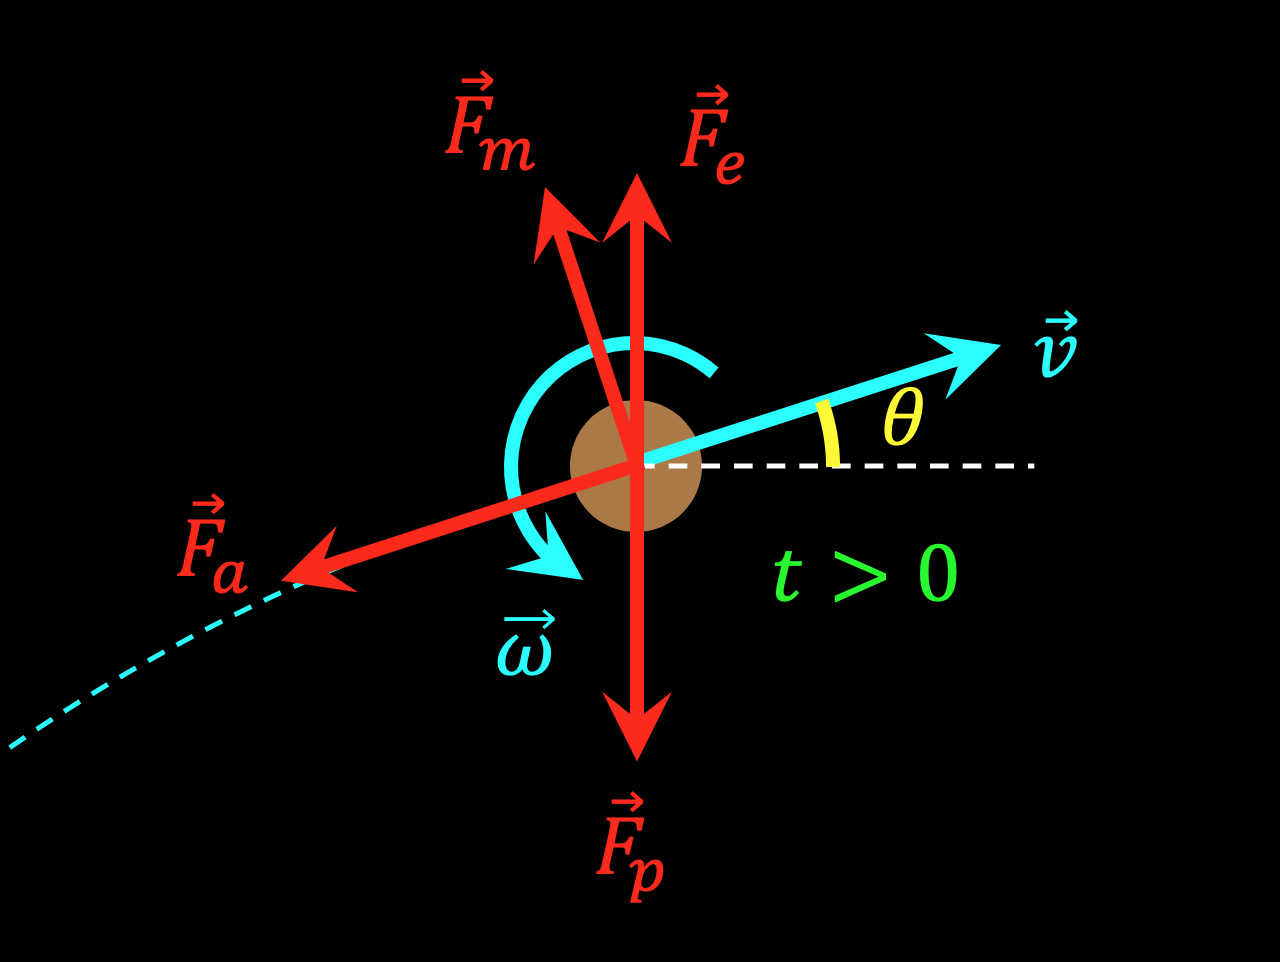
</div>

-

<div>
    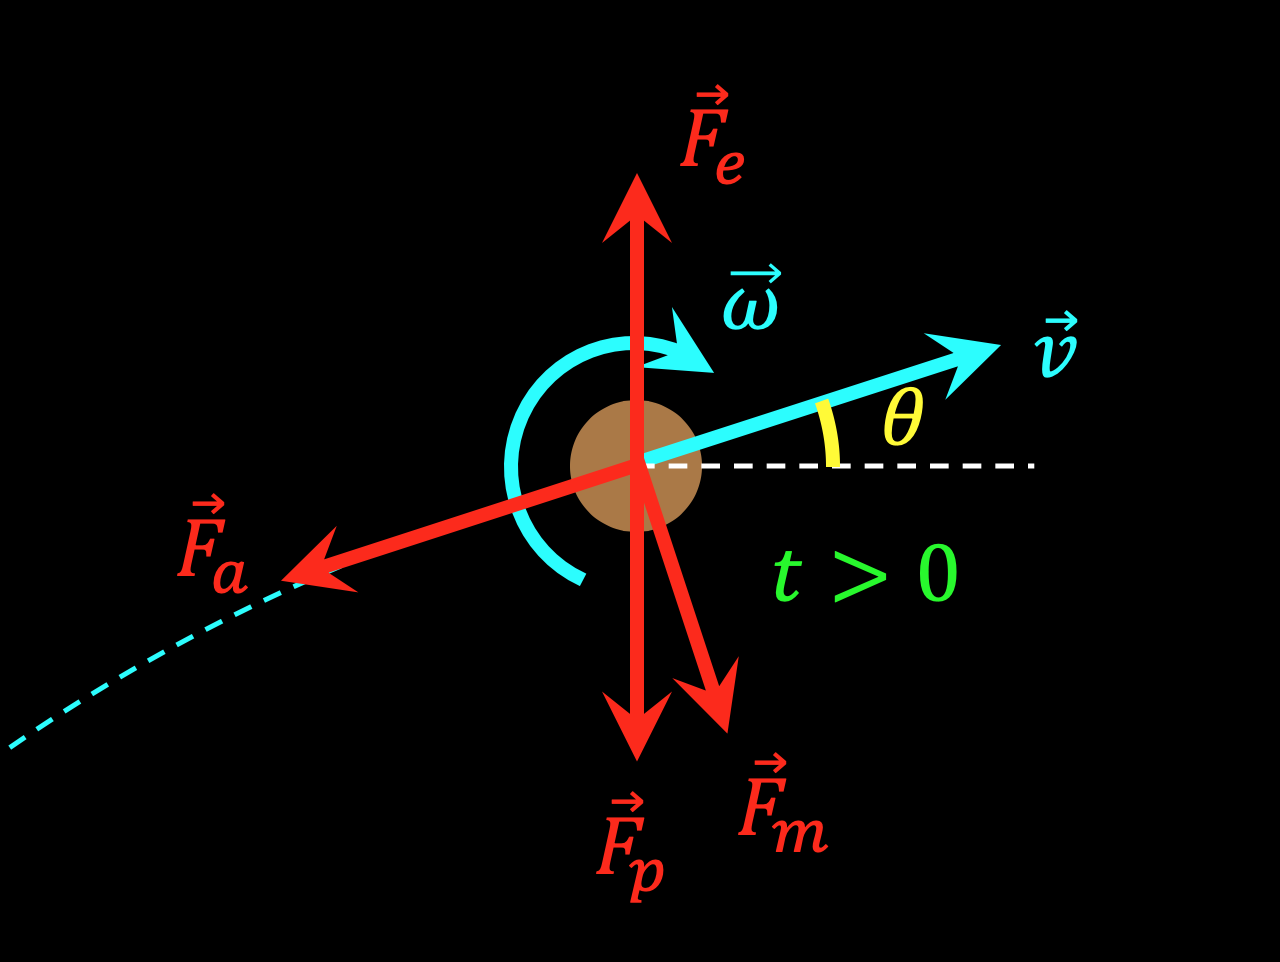
</div>



#### Conclusão

Há inúmeros aprimoramentos adicionais que poderíamos incluir em nosso modelo. Mas a pergunta que **sempre** devemos fazer é: a que custo? Será que um modelo mais complexo é necessariamente melhor? 

A própria atividade dessa aula já responde muito bem essa pergunta:
- Para a esfera de aço, a inclusão da resistência do ar (2ª iteração) e do empuxo do ar (3ª iteração) não trouxe quase nenhuma melhoria
- Para as esferas de madeira e isopor, a inclusão da resistência do ar (2ª iteração) trouxe grandes melhorias, mas o empuxo do ar (3ª iteração) não
- Para os balões de ar e hélio, tanto a inclusão da resistência do ar (2ª iteração) como do empuxo do ar (3ª iteração) trouxeram grandes melhorias

Ou seja, devemos sempre levar em consideração não apenas o sistema em si, mas também o que queremos estudar, provar ou demonstrar com ele!